<a href="https://colab.research.google.com/github/shabana1408/Prediction-of-Product-Sales/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: `Shabana Patel`

## Project Overview

### Data science - Project 1

Sales prediction for food items sold at various stores.
The goal of this project is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

#### Part 1

1) Create a GitHub Account

2) Set up a GitHub repository that will house your first portfolio project.

3) Add Markdown cells with your name and section headers to the notebook.

4) Add the Google Colab Notebook to your GitHub repository.

5) Submit the link to your GitHub repo!

#### Part 2


Download the data using this link: [Original source](https:/https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

- Insert code below the heading "Loading Data"
- Use Pandas to read the sales prediction data set into Google Colab.
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
- Explore the data - what do you need to do to clean this data? Clean it!
- Be sure to address each of the following tasks:
  - 1) How many rows and columns?
  - 2) What are the datatypes of each variable?
  - 3) Are there duplicates? If so, drop any duplicates.
  - 4) Identify missing values.
  - 5) Address the missing values by using a placeholder value.
  - 6) Confirm that there are no missing values after addressing them.
  - 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
  - 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

#### Part 3

The task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histograms to view the distributions of numerical features in your dataset
- Boxplots to view statistical summaries of numerical features in your dataset
- Countplots to view the frequency of each class of categorial features in your dataset
- Heatmap to view the correlation between features

## Data Dictionary

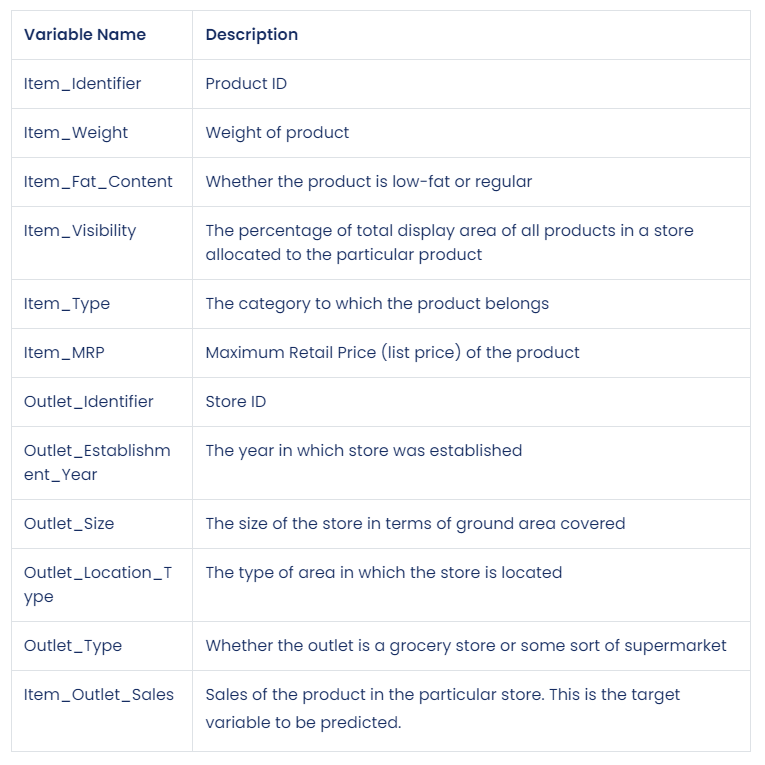

## Imports

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

df = pd.read_csv(fpath)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [117]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

Number of rows and columns:

In [118]:
df.shape

(8523, 12)



- There are `8 523` rows and `12` columns.


Checking the data types:

In [119]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

 - There are `5` numerical columns and `7` categorical\string columns.

 - Data types apper as they should be.

Checking for duplicates:

In [120]:
df.duplicated().sum()

0

- There are `no` duplicates in the data.

Checking for missing values:

In [121]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- What percentage do these missing values represent?

In [122]:
df.isna().mean() * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

  - There are `1 463` missing values in the `Item_Weight` column (17.17%).
  - There are `2 410` missing values in the `Outlet_Size` column (28.28%).

## Exploratory Data Analysis

Format visuals:

In [123]:
##plt.style.available

In [124]:
plt.style.use(['dark_background','seaborn-v0_8-notebook'])

## Explanatory Data Analysis

**Addressing missing values**

With regard to missing values we can:
- drop the missing values
- assume a central value for numerical missing values, e.g. the mean
- assume a placeholder value for missing values, e.g. -1, 0, 'Unknown', etc.

*Item_Weight:*

In [125]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

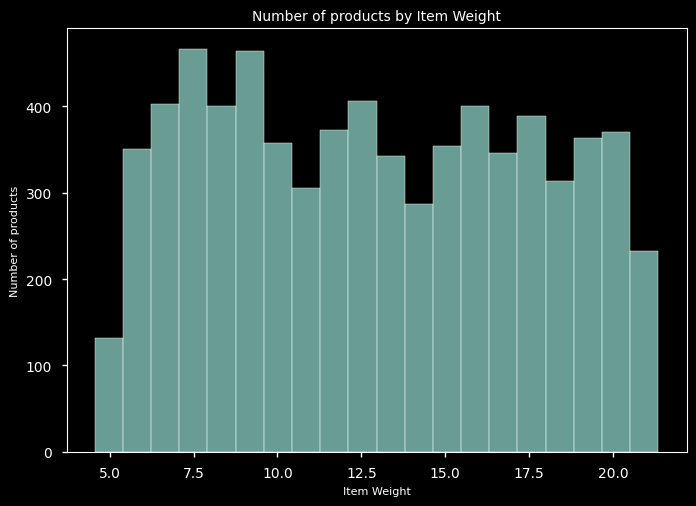

In [126]:
ax = sns.histplot(data = df, x = 'Item_Weight')
ax.set_title('Number of products by Item Weight', fontdict={'fontsize':10})
ax.set_xlabel('Item Weight', fontdict={'fontsize':8})
ax.set_ylabel('Number of products', fontdict={'fontsize':8});

- From the graph above it is clear that this column is equal to a wide range of values.

  - A suggestion is to simply drop the missing values. However, one has to consider the amount of data that will be lost, i.e. `17.17%`.

  - An alternate suggestion is to assume a value for the missing values.

Determine the mean and median:

In [127]:
print(df['Item_Weight'].mean())
print(df['Item_Weight'].median())

12.857645184135976
12.6


- The mean value for `Item_Weight` is `12.86` while the median value is `12.6`.
- I've decided to replace the missing values with the mean value:

In [128]:
mean_value = df['Item_Weight'].mean()
df['Item_Weight'] = df['Item_Weight'].fillna(mean_value)

- Lets check that the values for `Item_Weight` are updated:

In [129]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

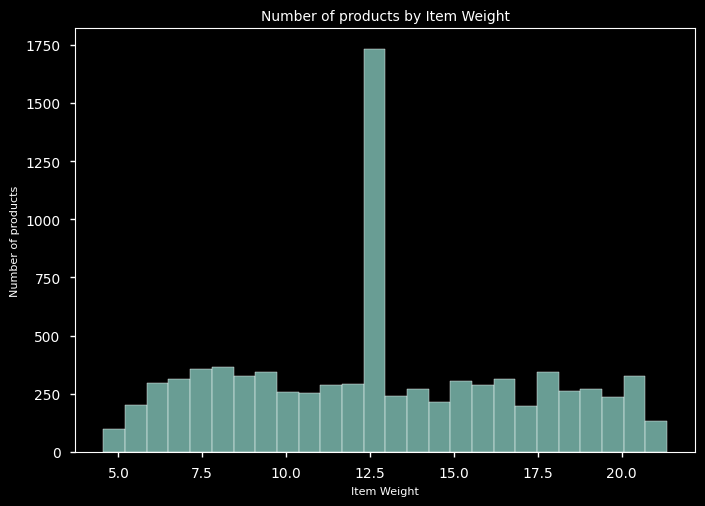

In [130]:
ax = sns.histplot(data = df, x = 'Item_Weight')
ax.set_title('Number of products by Item Weight', fontdict={'fontsize':10})
ax.set_xlabel('Item Weight', fontdict={'fontsize':8})
ax.set_ylabel('Number of products', fontdict={'fontsize':8});

*Outlet_Size:*

In [131]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

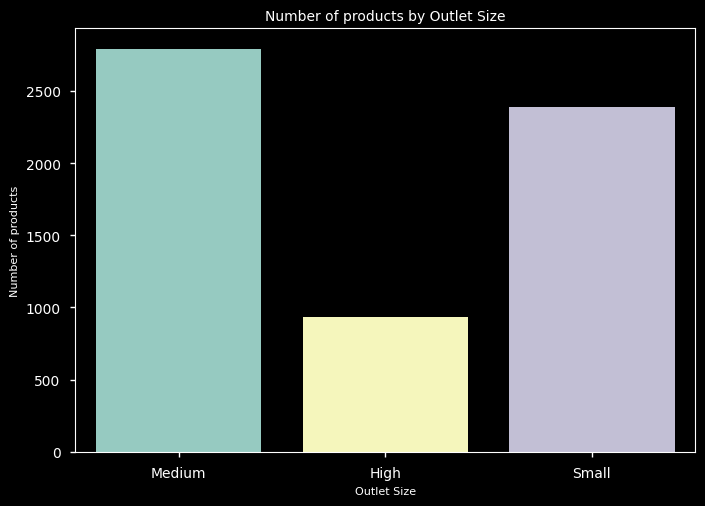

In [132]:
ax = sns.countplot(data = df, x = 'Outlet_Size')
ax.set_title('Number of products by Outlet Size', fontdict={'fontsize':10})
ax.set_xlabel('Outlet Size', fontdict={'fontsize':8})
ax.set_ylabel('Number of products', fontdict={'fontsize':8});

- This column assumes three values, i.e. Small, Medium and High.

  - I suggest to add a fourth value `Unknown` for the missing values.

In [133]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')

In [134]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- Lets check that the values for `Outlet_Size` are updated, i.e. there are no missing values:

In [135]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

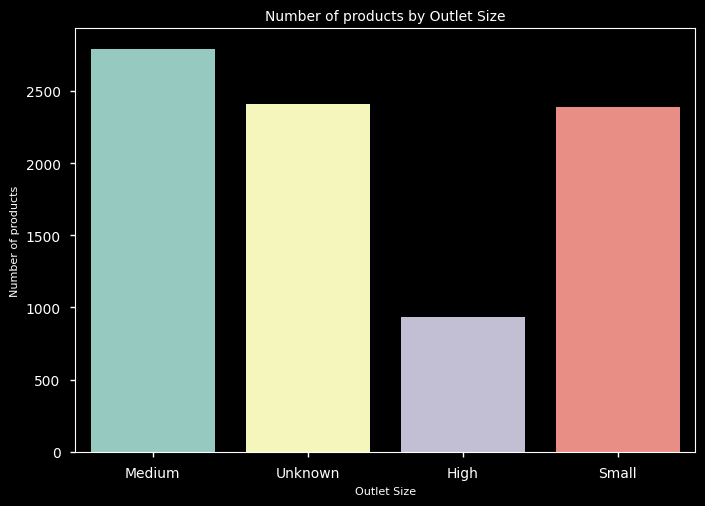

In [136]:
ax = sns.countplot(data = df, x = 'Outlet_Size')
ax.set_title('Number of products by Outlet Size', fontdict={'fontsize':10})
ax.set_xlabel('Outlet Size', fontdict={'fontsize':8})
ax.set_ylabel('Number of products', fontdict={'fontsize':8});

**Addressing data types**

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Data types appear as they should be.

**Addressing inconsistent categories of data**

We will look at all of the object type columns to inspect them further.

In [138]:
obj_columns = df.select_dtypes('object')
obj_columns

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Unknown,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Unknown,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [139]:
for i in obj_columns:
  print(i)
  print(df[i].value_counts())
  print('\n')

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    55

- The following inconsistencies where found:

Item_Fat_Content:
  - `LF` should be `Low Fat`
  - `low fat` should be `Low Fat`
  - `reg` should be `Regular`

We address this below using a dictionary to replace the inconsistent categories.

In [140]:
current = ['Low Fat', 'Regular', 'LF', 'reg', 'low fat']
replacement = ['Low Fat', 'Regular', 'Low Fat', 'Regular', 'Low Fat']

rename_dict = dict(zip(current, replacement))
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(rename_dict)

- Confirm that the inconsistent values have been addressed.

In [141]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Summary statistics for numerical columns**

In [142]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [143]:
stats =  df.describe().round(2)
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.86,0.07,140.99,1997.83,2181.29
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96



## Explanatory Data Analysis

**Column by column**

We use a function to plot graphs per numerical column.

In [144]:
def create_numeric_graphs(df, inp_x):

  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True);

  sns.histplot(data=df,x = inp_x,ax = axes[0]);

  mean_value = df[inp_x].mean()
  axes[0].axvline(mean_value, color='grey', ls='solid');

  med_value = df[inp_x].median()
  axes[0].axvline(med_value, color='white', ls='dashed');

  sns.boxplot(data=df, x = inp_x, ax = axes[1]);

  axes[0].set_title(f'Explanatory data analysis: {inp_x}', fontdict={'fontsize':10});

  plt.show()

In [145]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

> We can exclude `Outlet_Establishment_Year` since the graphs will only show counts per year.

In [146]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

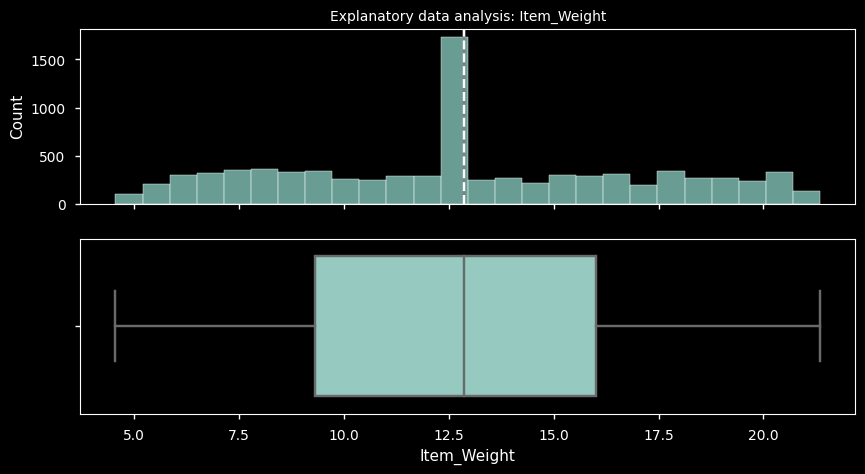

In [147]:
create_numeric_graphs(df,'Item_Weight')

> There seems to be no outliers in th Item_Weight field. Note that assuming the central value of the mean for the missing values in this column has resulted in the taller bar being higher.

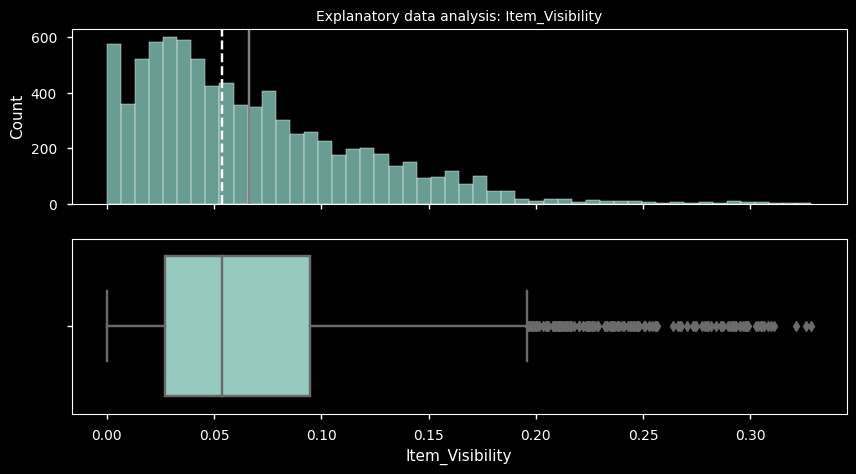

In [148]:
create_numeric_graphs(df,'Item_Visibility')

> From the boxplot we can see that there are several outliers in the Item_Visibility column. These may be valid data points, or they could be an error.

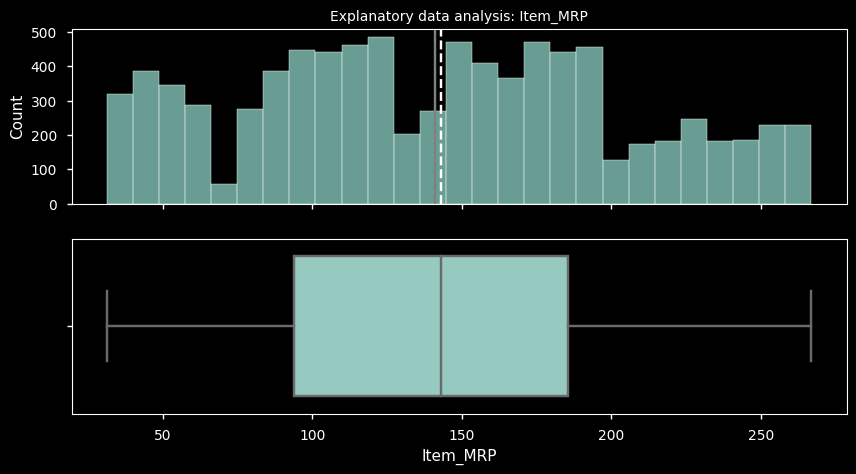

In [149]:
create_numeric_graphs(df,'Item_MRP')

> There seems to be no outliers in the Item_MRP field.

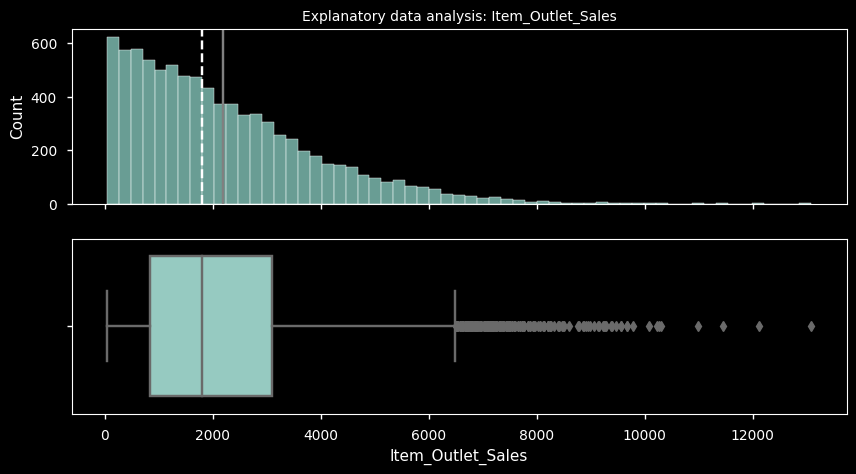

In [150]:
create_numeric_graphs(df,'Item_Outlet_Sales')

> From the boxplot we can see that there are several outliers in the Item_Outlet_Sales column. These may be valid data points, or they could be an error.

We use a function to plot a bar graph per categorical column.

In [151]:
def create_cat_graphs(df, inp_x):

  fig, ax = plt.subplots(figsize=(10,5));

  for_graph = df[inp_x].value_counts().sort_values(ascending=False).to_frame()

  sns.barplot(data=for_graph, x=for_graph.index, y=for_graph[inp_x],ax=ax)
  plt.xticks(rotation= 90)
  ax.set_title(f'Explanatory data analysis: {inp_x}', fontdict={'fontsize':10});
  ax.set_xlabel(f'Categories of {inp_x}', fontdict={'fontsize':8})
  ax.set_ylabel('Counts', fontdict={'fontsize':8})

  plt.show()

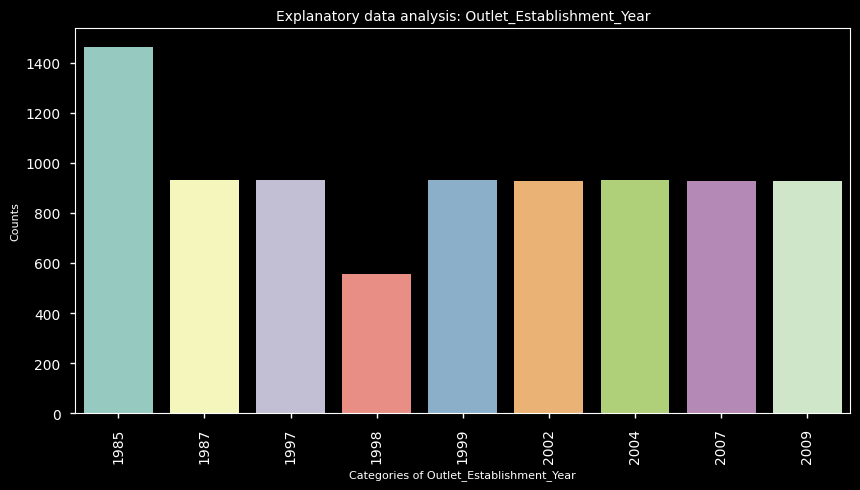

In [166]:
create_cat_graphs(df, 'Outlet_Establishment_Year')

> The highest counts are from stores established in `1985`.
*`Why didn't my graph sort?`*

In [152]:
obj_cols = df.select_dtypes('object').columns
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

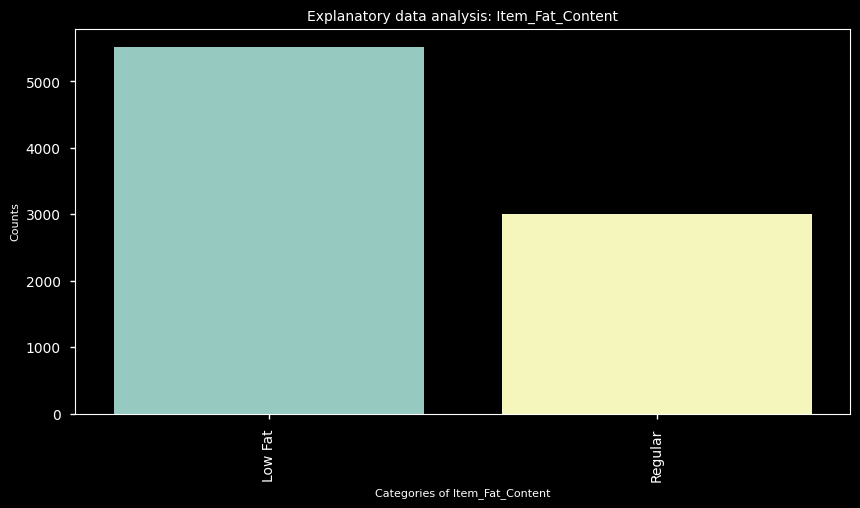

In [153]:
create_cat_graphs(df, 'Item_Fat_Content')

> The above graph illustrates that there are more Low Fat products than Regular products.

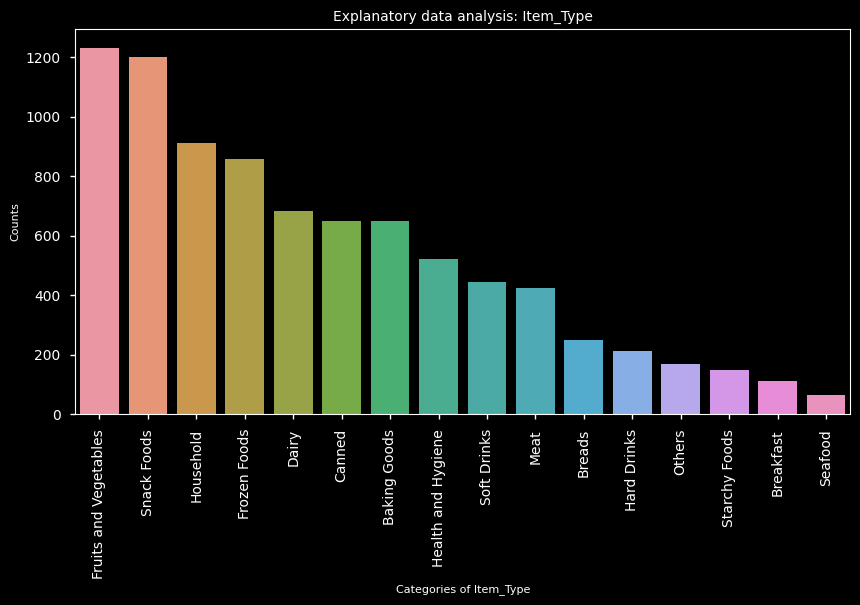

In [154]:
create_cat_graphs(df, 'Item_Type')

> We can deduce the top three item types from the graph above:
- `Fruits and vegetables`
- `Snack foods`
- `Household items`

> We also see that the item type with the least counts is `Seafood`.

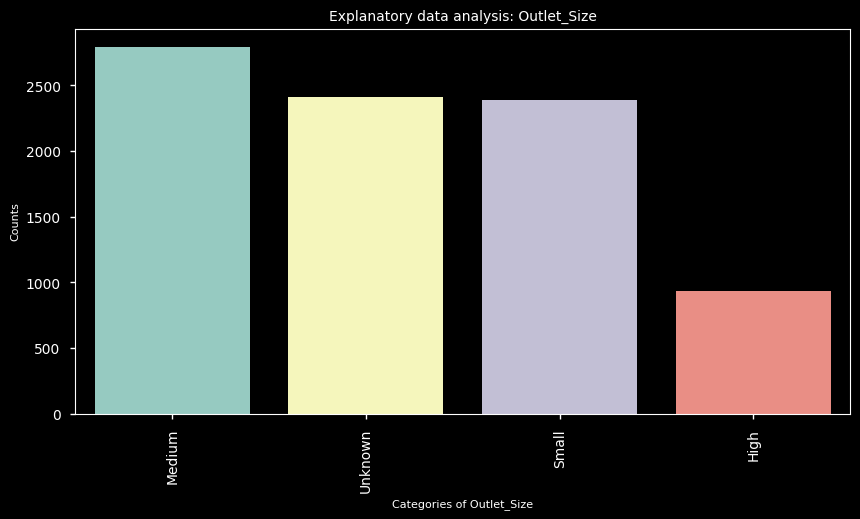

In [156]:
create_cat_graphs(df, 'Outlet_Size')

> Stores with a `Medium` size has the most counts with stores with a `High` size in terms of ground area covered has the least counts.

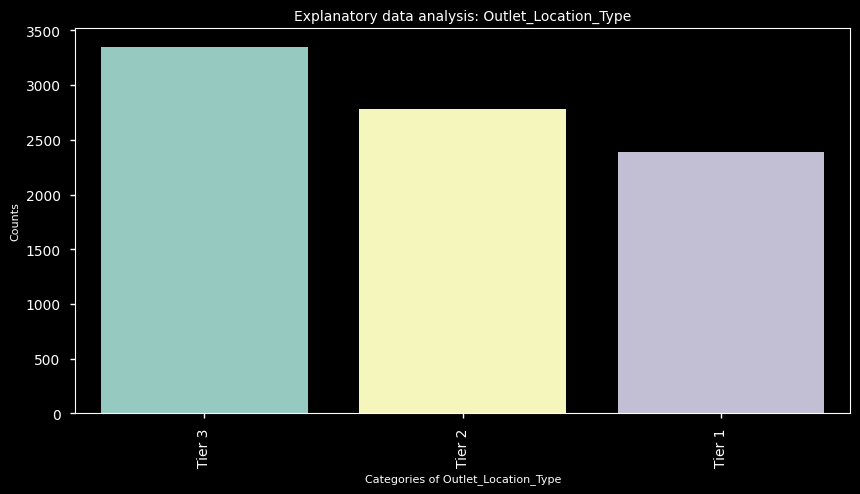

In [157]:
create_cat_graphs(df, 'Outlet_Location_Type')

`Tier 3` stores have the most counts while `Tier 1` stores have the least counts.

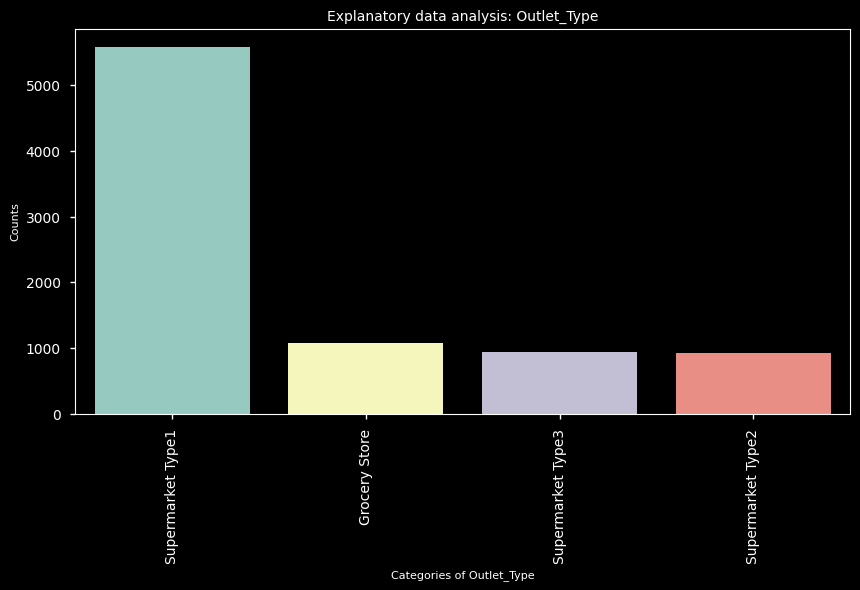

In [158]:
create_cat_graphs(df, 'Outlet_Type')

In [165]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

`Supermarket Type 1` have the most counts while `Supermarket Type 2 and Type 3` have the least counts (similar proportion).

**Correlations**

Correlations of all numeric columns:

In [167]:
corr = df.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


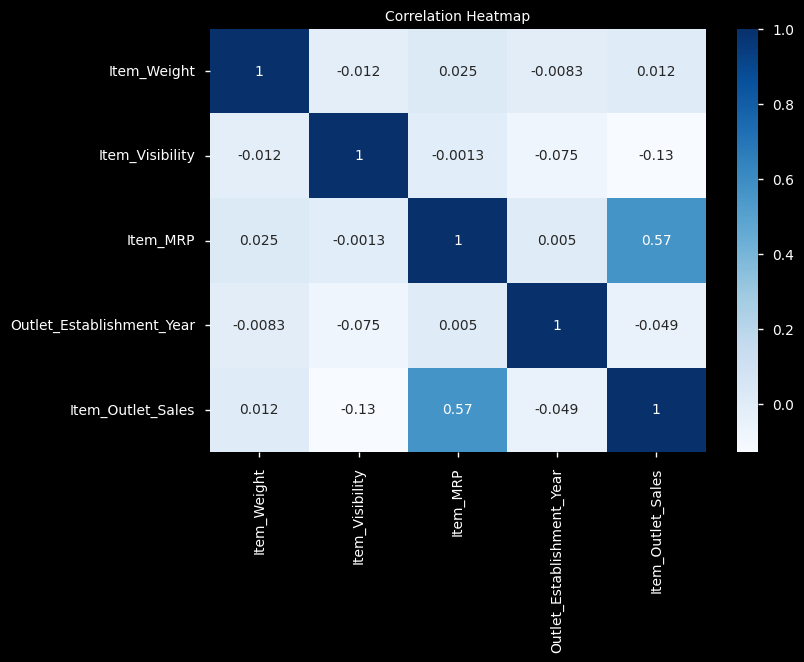

In [168]:
ax = sns.heatmap(corr, annot = True, cmap = 'Blues')
ax.set_title('Correlation Heatmap', fontdict={'fontsize':10});

> There seems to be a moderate positive correlation between
- `Item_MRP` and `Item_Outlet_Sales`

**We can also consider all fields at the same time as follows:**

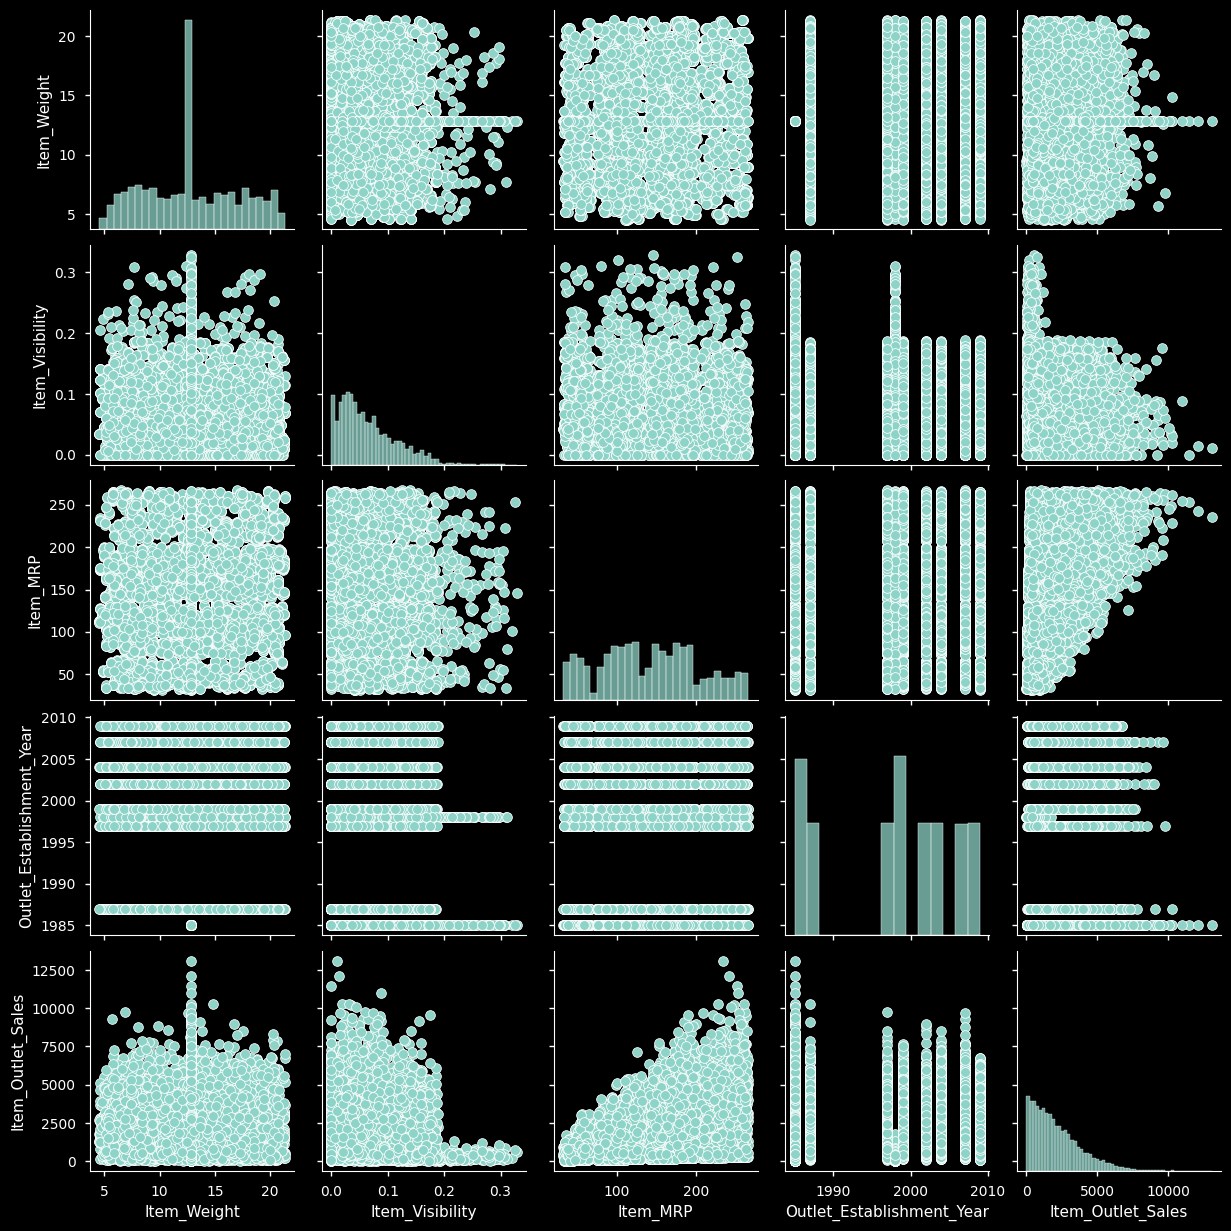

In [169]:
sns.pairplot(df);